In [1]:
import numpy
import matplotlib.patches as patches
from matplotlib import colors
import mitsuba as mi 
mi.set_variant("cuda_ad_rgb")
import drjit as dr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from PDE2D.Coefficient import *
from PDE2D.utils import *
from PDE2D.BoundaryShape import *
from PDE2D.Solver import *
from PDE2D.utils.helpers import *
from mitsuba import Float,Point2f

In [2]:
rad = 1.2
dirichlet = [ConstantCoefficient("dirichlet", 1)]
neumann = [ConstantCoefficient("neumann", 2)]
angle_partition = np.array([0, np.pi/2, 3 * np.pi/4, np.pi, 3 * np.pi /2])
dirichlet_map = np.array([True, False, False, False, True])
shape = CircleShape(origin =Point2f(0.,0.), radius = rad, name = "in-boundary", epsilon = 1e-4,
                       dirichlet=dirichlet, neumann = neumann, angle_partition = angle_partition, dirichlet_map = dirichlet_map)

In [3]:
bbox = [[-1.8,-1.8], [1.8,1.8]]
resolution = [512,512]
image = np.zeros(resolution)

In [4]:
r = 1.2;
num_points = 2
theta = np.linspace(0,2*np.pi * (num_points-1)/ num_points,num_points) - np.pi /2
x = r * np.cos(theta)
y = r * np.sin(theta)
points =Point2f(x, y)
indices = np.arange(num_points)
bi = shape.boundary_interaction(points);

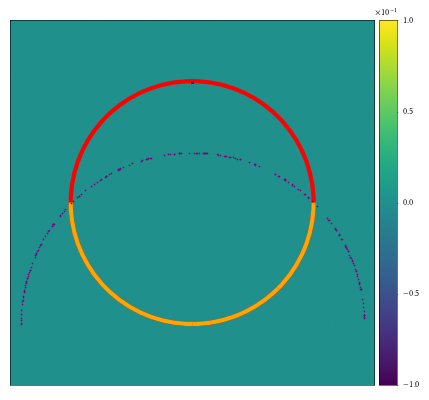

In [12]:
fig, (ax) = plt.subplots(1, 1, figsize=[5, 5])
plot_image(image, ax)
shape.sketch(ax, bbox, resolution)

sampler = PCG32()
sampler.seed(1, num_points)
for i in range(200):
    direction, sphere_points, pdf = bi.sample_recursive(sampler.next_float32())
    sphere_points = (direction * bi.r + bi.origin)
    sphere_points = point2sketch(sphere_points, bbox, resolution).numpy()
    ax.scatter(sphere_points[0,:], sphere_points[1,:], color = "purple", s=0.5)
    

[1.4641377 1.247762 ]


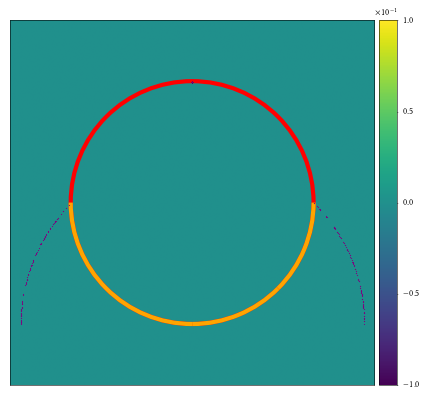

In [13]:
fig, (ax) = plt.subplots(1, 1, figsize=[5, 5])
plot_image(image, ax)
shape.sketch(ax, bbox, resolution)

sampler = PCG32()
for i in range(200):
    direction,  pdf = bi.sample_neumann(sampler.next_float32(), on_boundary = Bool(bi.on_boundary))
    sphere_points = (direction * bi.r + bi.origin)
    sphere_points_s = point2sketch(sphere_points, bbox, resolution).numpy()
    ax.scatter(sphere_points_s[0,:], sphere_points_s[1,:], color = "purple", s=0.1)
print(np.sqrt(np.sum(np.square(sphere_points), axis=1)))